<a href="https://colab.research.google.com/github/Nikhil768692/machine_learning/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries Required

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Load and Explore Dataset

In [2]:
# Load dataset
data = pd.read_csv('/content/student-mat.csv', sep=';')

# Display first few rows
print(data.head())

# Check basic information
print(data.info())

# Check for any missing values
print(data.isnull().sum())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

Encode Categorical Features
Since we have categorical features (like gender, parental education, etc.), we need to convert them into numerical format.

In [3]:
# Encode categorical features using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

Split Features and Target
Features (X): All columns except the final grade (G3).
Target (y): The final grade (G3), which we aim to predict.


In [4]:
# Separate features and target variable
X = data.drop(columns=['G3'])
y = data['G3']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Model Development

In [5]:
# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = lin_reg.predict(X_test_scaled)

# Evaluate model
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse_lin}")
print(f"Linear Regression - R² Score: {r2_lin}")

Linear Regression - Mean Squared Error: 5.032394108866746
Linear Regression - R² Score: 0.7545777855043497


Random Forest Regressor Model

In [6]:
# Train a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Evaluate model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")

Random Forest - Mean Squared Error: 3.5104506329113927
Random Forest - R² Score: 0.8288006563935861


Feature Importance (for Random Forest)

Random forests give us the ability to analyze feature importance, which is crucial for understanding the impact of different features like attendance or study habits on students' grades.

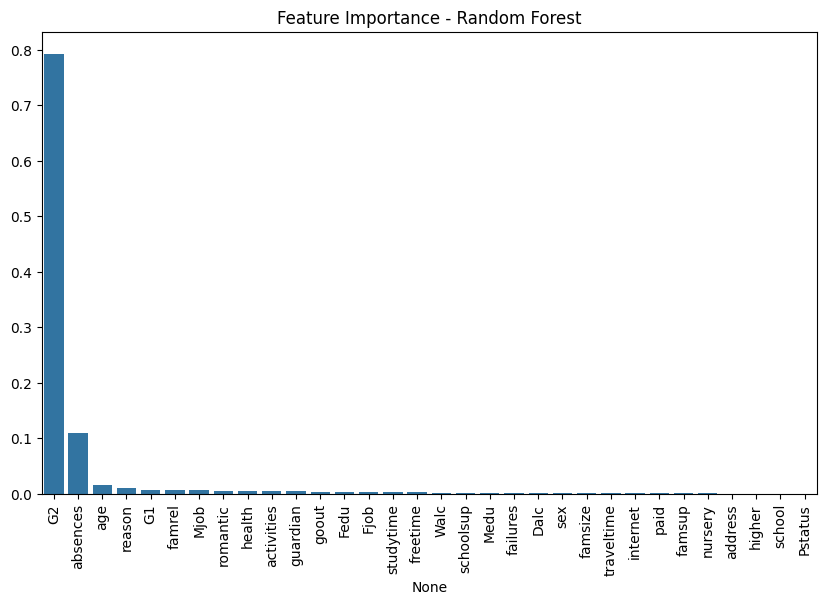

In [7]:
# Get feature importances from Random Forest
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns[indices], y=importances[indices])
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=90)
plt.show()